In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
advt = pd.read_csv('cargo_departures.csv')
advt = advt.fillna(0)
advt.drop('Day', axis=1, inplace=True)


In [ ]:
advt.head(15)

,Boksit,Izvestnyak,KoncentratZ,Okatysh,EmptyWagon,RudaZ,Ugol
0,14888.4,6275.0,0.0,0.0,13400.0,11937.8,32493.00
1,19857.0,0.0,0.0,0.0,19959.9,5960.0,25947.20
2,9928.3,6273.0,0.0,0.0,16602.0,17918.0,45019.20
3,19851.5,6275.0,0.0,0.0,14929.0,5964.0,52171.00
4,4961.5,6274.0,0.0,0.0,11572.0,11877.0,39041.90
5,24814.5,0.0,0.0,0.0,16437.0,5981.0,25945.40
6,4963.0,6271.0,0.0,0.0,6580.0,11936.0,12550.60
7,14887.4,6273.0,0.0,0.0,15175.0,5974.0,38210.01
8,0.0,6268.0,0.0,0.0,16403.0,11924.0,45044.40
9,19854.4,0.0,0.0,0.0,16654.1,5980.0,44771.30


In [ ]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Boksit       1101 non-null   float64
 1   Izvestnyak   1101 non-null   float64
 2   KoncentratZ  1101 non-null   float64
 3   Okatysh      1101 non-null   float64
 4   EmptyWagon   1101 non-null   float64
 5   RudaZ        1101 non-null   float64
 6   Ugol         1101 non-null   float64
dtypes: float64(7)
memory usage: 60.3 KB


In [ ]:
advt.describe()

,Boksit,Izvestnyak,KoncentratZ,Okatysh,EmptyWagon,RudaZ,Ugol
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,16323.603642,6066.846866,3163.364668,2424.597911,19072.289464,1859.645141,47005.456612
std,6852.047089,3054.506856,3593.516173,3159.117150,3089.938826,3909.727412,8809.135974
min,0.000000,0.000000,0.000000,0.000000,6580.000000,0.000000,12550.600000
25%,14582.900000,6264.800000,0.000000,0.000000,16731.100000,0.000000,39096.800000
50%,14892.200000,6269.000000,4411.000000,0.000000,19124.500000,0.000000,45393.400000
75%,19853.100000,6272.900000,4497.500000,4495.300000,21164.300000,0.000000,51865.700000
max,58644.100000,12556.300000,17985.800000,13508.600000,28168.000000,17937.000000,116827.600000


In [ ]:
advt.isnull().sum()

,0
Boksit,0
Izvestnyak,0
KoncentratZ,0
Okatysh,0
EmptyWagon,0
RudaZ,0
Ugol,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


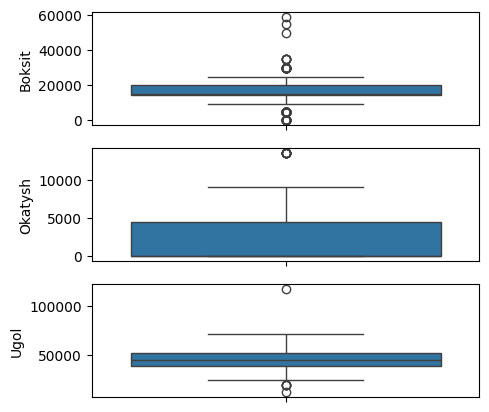

In [ ]:
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(advt['Boksit'], ax = axs[0])
plt1 = sns.boxplot(advt['Okatysh'], ax = axs[1])
plt1 = sns.boxplot(advt['Ugol'], ax = axs[2])

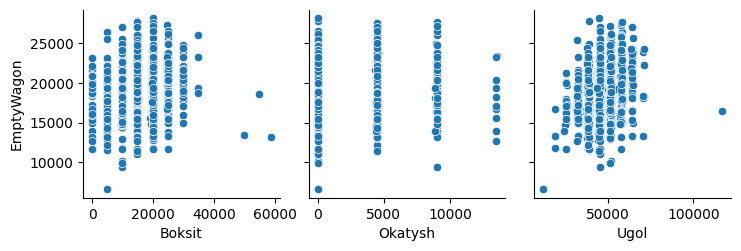

In [ ]:
sns.pairplot(advt, x_vars=['Boksit', 'Okatysh', 'Ugol'], y_vars='EmptyWagon')

<Axes: >

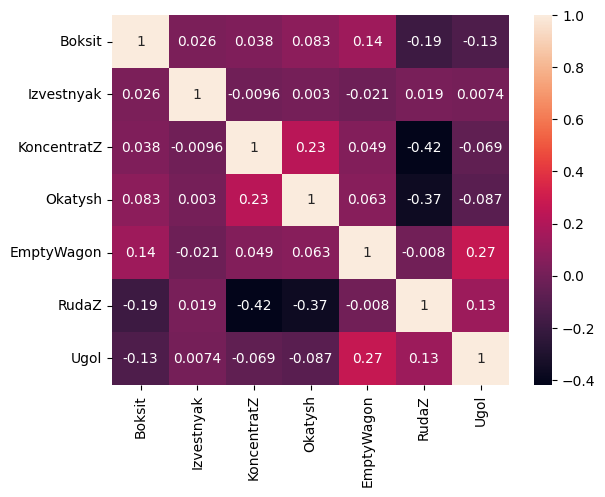

In [ ]:
sns.heatmap(advt.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = advt['Boksit']
y = advt['Ugol']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
X_train.shape

(880,)

In [ ]:
X_test.shape

(221,)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
# y = ax + b
a = model.coef_
b = model.intercept_
print('y = ' + str(a[0]) + 'x' + '+' + str(b))

y = -0.17635025378850017x+49949.096474492


In [ ]:
y_pred = model.predict(X_train.values.reshape(-1, 1))

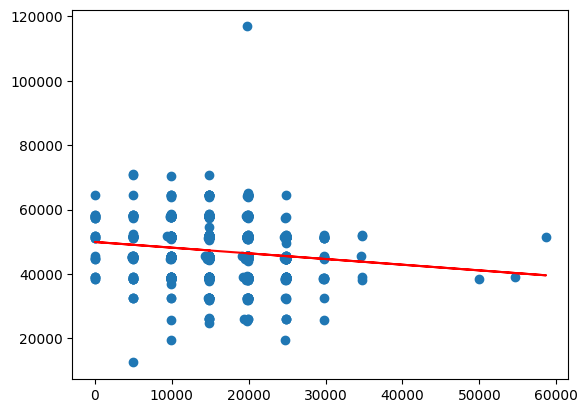

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, 'r')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_pred=y_pred, y_true=y_train)

72873280.61629146

In [ ]:
mean_absolute_error(y_pred=y_pred, y_true=y_train)

6586.006640409291

In [ ]:
y_train.mean()

47047.85003409091

In [ ]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

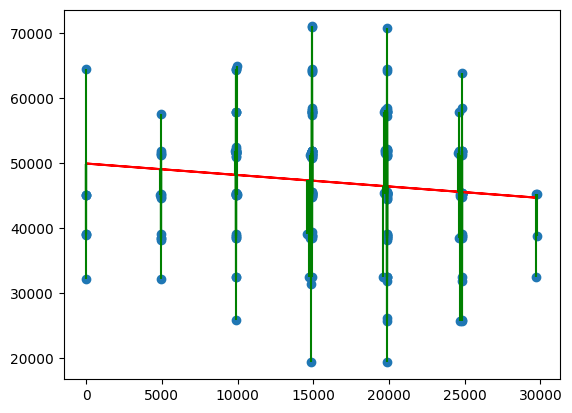

In [ ]:
plt.scatter(X_test, y_test)
y_error = y_test - y_pred
plt.plot(X_test, y_pred, 'r')
plt.vlines(X_test, y_pred, y_pred + y_error, 'g')

In [ ]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

90035941.19644897

In [ ]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

7465.934425438858

In [ ]:
y_test.mean()

46836.65022624434